In [28]:
import torch 
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn import Linear,Flatten,CrossEntropyLoss,Module,ReLU,Sequential,MSELoss
import torchvision.transforms as transforms

In [27]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 1.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.1/2.1 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 436.0/436.0 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB 2.9 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 KB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\sj36580\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [18]:
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Sequential(
        Linear(28*28,256),
        ReLU(),
        Linear(256,64),
        ReLU(),
        Linear(64,32),
        ReLU(),
        Linear(32,10)
        
        )
        self.decoder = Sequential(
             Linear(10,32),
        ReLU(),
        Linear(32,256),
        ReLU(),
        Linear(256,28*28)       

        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded =  self.decoder(encoded)
        return decoded


model = autoencoder()
loss_fn = MSELoss()
optimizer = optim.Adam(model.parameters(),lr = 0.01,weight_decay = 1e-8)


In [24]:

epochs = 10
epoch_loss =[]
ouput_image =[]
for epoch in range(epochs):
    train_loss =0
    for (image, _) in train_loader:
        optimizer.zero_grad()
        
        input = image.reshape(-1, 28*28)
        
        output = model(input)
        loss = loss_fn(output,input)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        if i%500 == 499:
            print('Epoch:',epoch,' batch: ',i ,' Loss:',train_loss)
    ouput_image.append((epoch, input, output))    

    
    print('Epoch:',epoch,' Loss',train_loss)
    epoch_loss.append(train_loss)


Epoch: 0  Loss 205.91576313972473
Epoch: 1  Loss 193.64260257780552
Epoch: 2  Loss 190.57819144427776
Epoch: 3  Loss 188.7252834737301
Epoch: 4  Loss 187.5384537577629
Epoch: 5  Loss 186.7822739481926
Epoch: 6  Loss 186.2546055316925
Epoch: 7  Loss 185.4587408453226
Epoch: 8  Loss 185.57021614909172
Epoch: 9  Loss 185.4488774240017


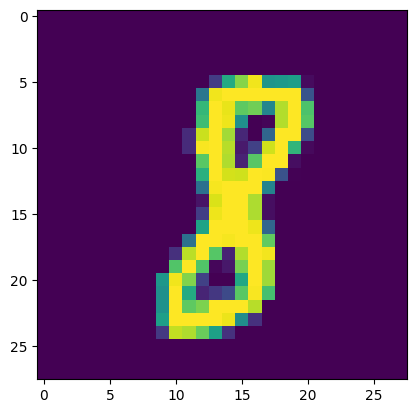

In [29]:
plt.imshow(image[0].reshape(-1,28,28)[0])